In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Paired')
%load_ext autoreload


%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
elections = pd.read_csv("./data/volby/volby_sociodemo.csv",sep=";")
elections.shape


(14271, 51)

In [75]:
elections['obec'] =  elections['obec'].astype(object)
elections['sl11zeny']  = elections['sl11obyvatel'] - elections['sl11muzi']


In [76]:
duplicate_rows = elections.duplicated().sum()
duplicate_districts = elections['obec_okrsek'].duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")
print(f"Duplicated districts: {duplicate_districts}")



Duplicated rows: 0
Duplicated districts: 0


In [77]:
elections =  elections.set_index(elections['obec_okrsek'])

In [78]:
def to_ratio(df, col, base):
    df[col+'_ratio'] = df[col]/df[base]

In [79]:
for col in ['par21vsezn', 'par21spd',
       'par21spolu', 'par21pirsta', 'par21ano', 'par21soc', 'par21pri',
       'par21ksc', 'par21zel', 'par21tss']:
       to_ratio(elections, col, 'par21phcelkem')

for col in ['par17vsezn','par17ano', 'par17ods', 'par17top', 'par17kdu', 'par17spd',
       'par17soc', 'par17pir', 'par17sta', 'par17zel', 'par17ksc', 'par17svo']:
       to_ratio(elections, col, 'par17phcelkem')
for col in ['sl11muzi', 'sl11rozv', 'sl11deti', 'sl11seni',
       'sl11kat', 'sl11rom', 'sl11vs', 'sl11vos', 'sl11nast', 'sl11strm',
       'sl11strb', 'sl11zakl', 'sl11zam', 'sl11pod', 'sl11nezam',
       'sl11neprduch']:
       to_ratio(elections, col, 'sl11obyvatel')


In [80]:
elections['vel.obce_cat']  = pd.cut(elections['vel.obce'], [0,500,1000,5000,10000,20000,50000,100000, float("inf")])
translation = {
    '(0.0, 500.0]' : '500-',
    '(500.0, 1000.0]':'500-1k',
    '(1000.0, 5000.0]':'1-5k',
    '(5000.0, 10000.0]':'5-10k',
    '(10000.0, 20000.0]':'10-20k',
    '(20000.0, 50000.0]':'20-50k',
    '(50000.0, 100000.0]':'50-100k',
    '(100000.0, inf]':'100k+'
}

elections['vel.obce_cat'] = elections['vel.obce_cat'].astype(str).apply(lambda x: translation[x])

In [81]:
elections.to_csv("./data/volby/dataset_extended.csv",index=True,sep=";")

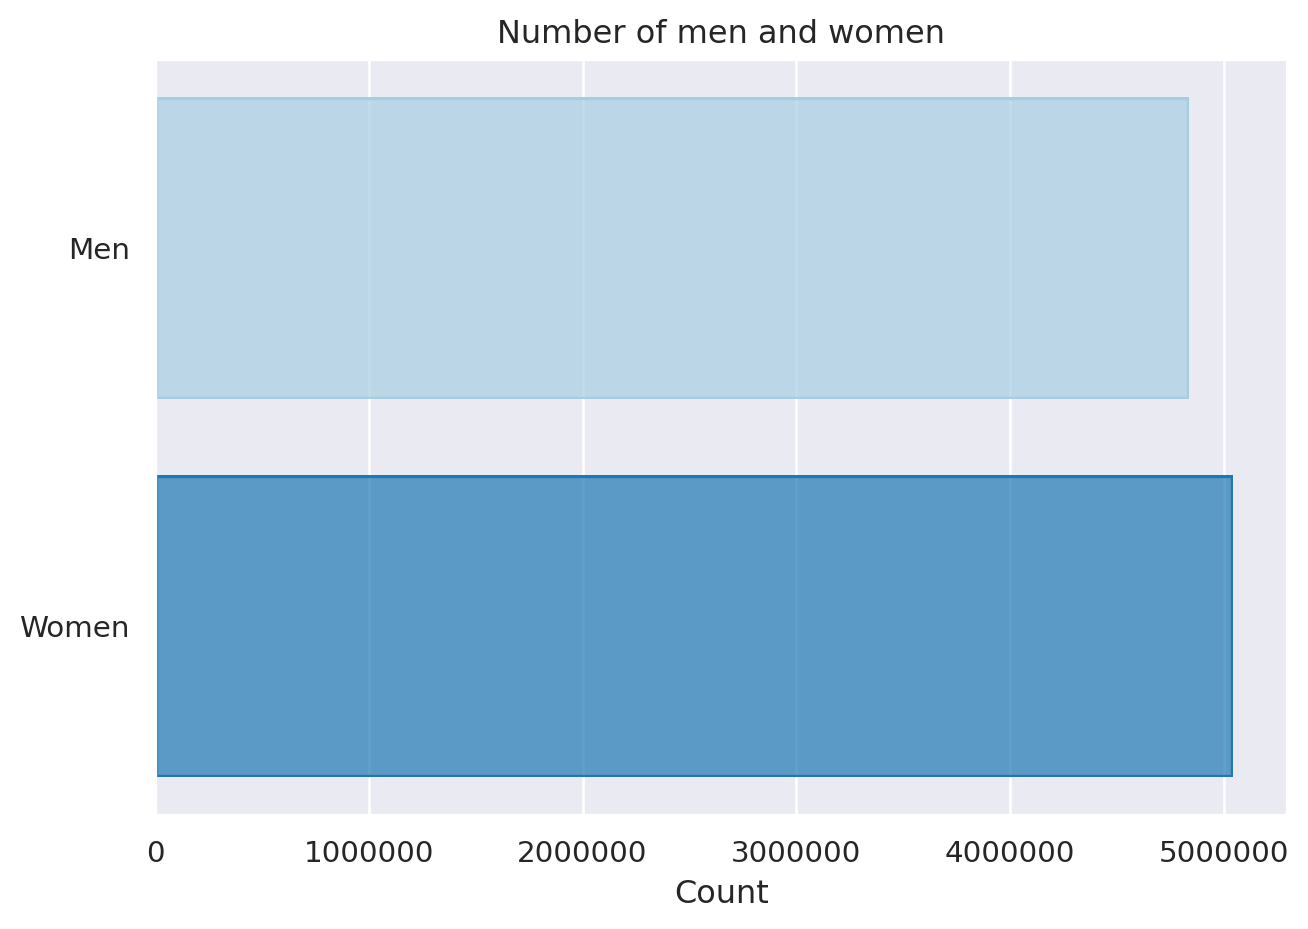

In [82]:
import scripts 
elections_extended = scripts.load_extended_dataset("./data/volby/dataset_extended.csv")
scripts.plot_gender_counts(elections_extended)


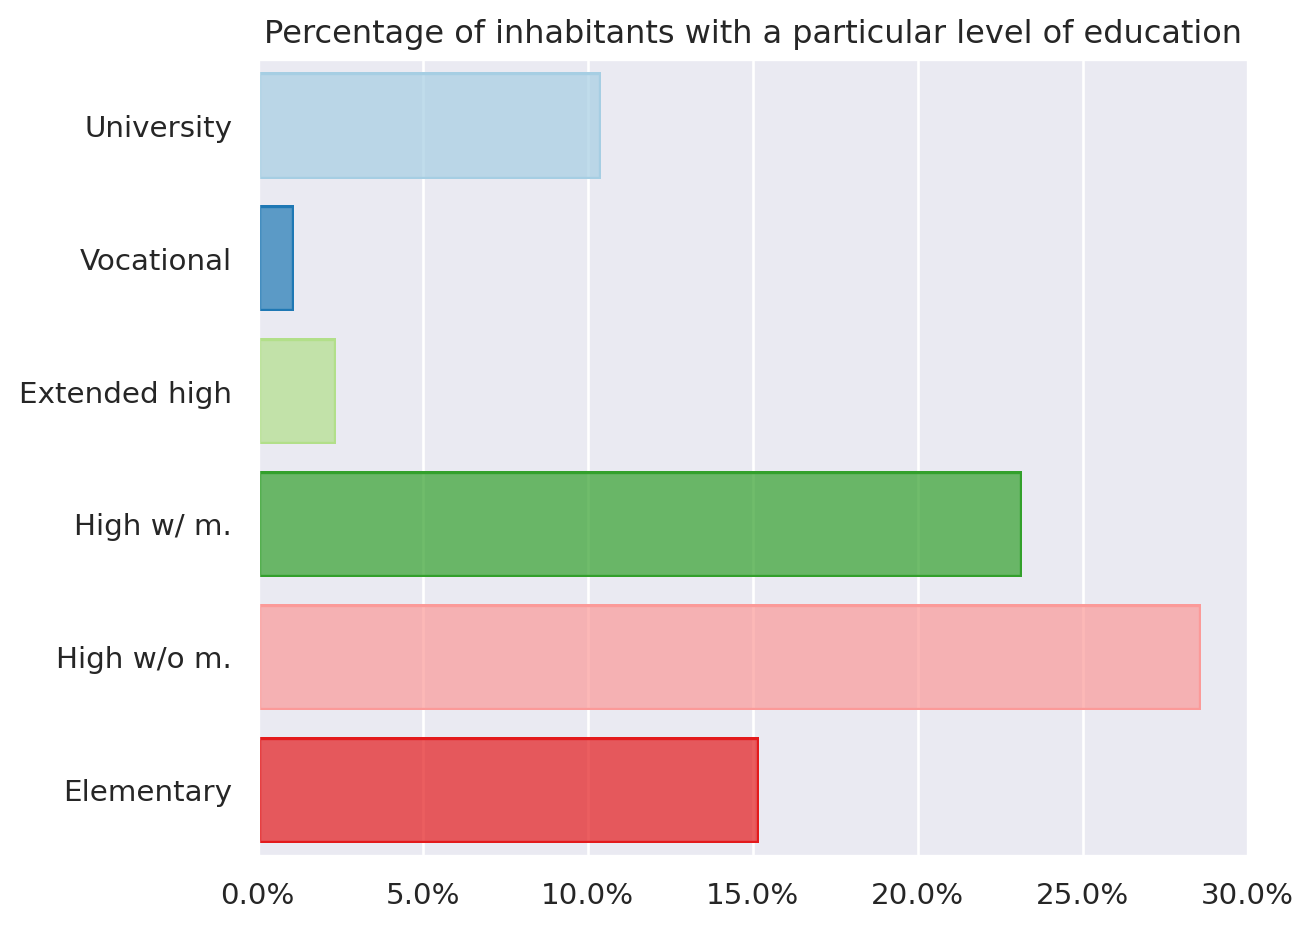

In [83]:
scripts.plot_edu_count(elections_extended)

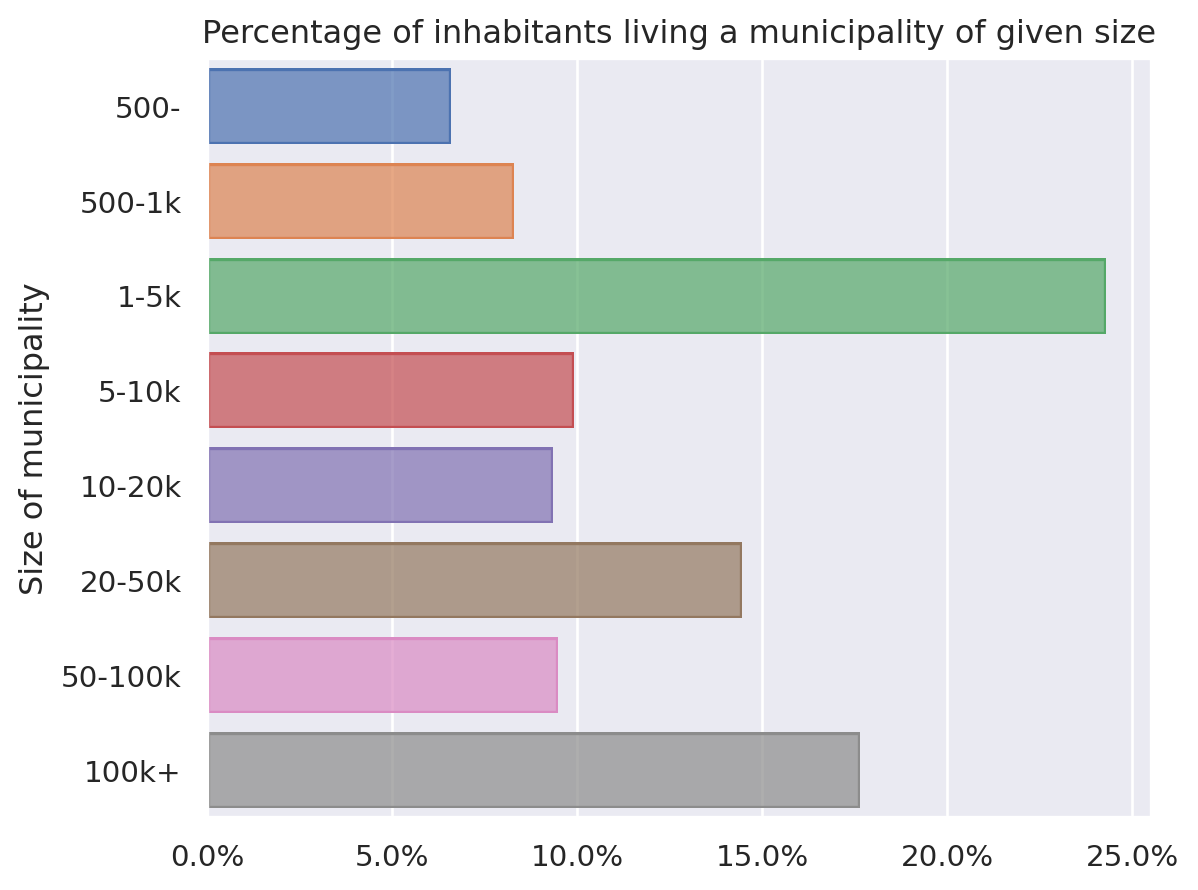

In [84]:
scripts.plot_municipality_size_ratio(elections_extended)

In [85]:
elections_extended.groupby("vel.obce_cat")["sl11obyvatel"].sum()

vel.obce_cat
1-5k       2399926
10-20k      923771
100k+      1744359
20-50k     1428168
5-10k       979599
50-100k     936796
500-        651911
500-1k      819641
Name: sl11obyvatel, dtype: int64

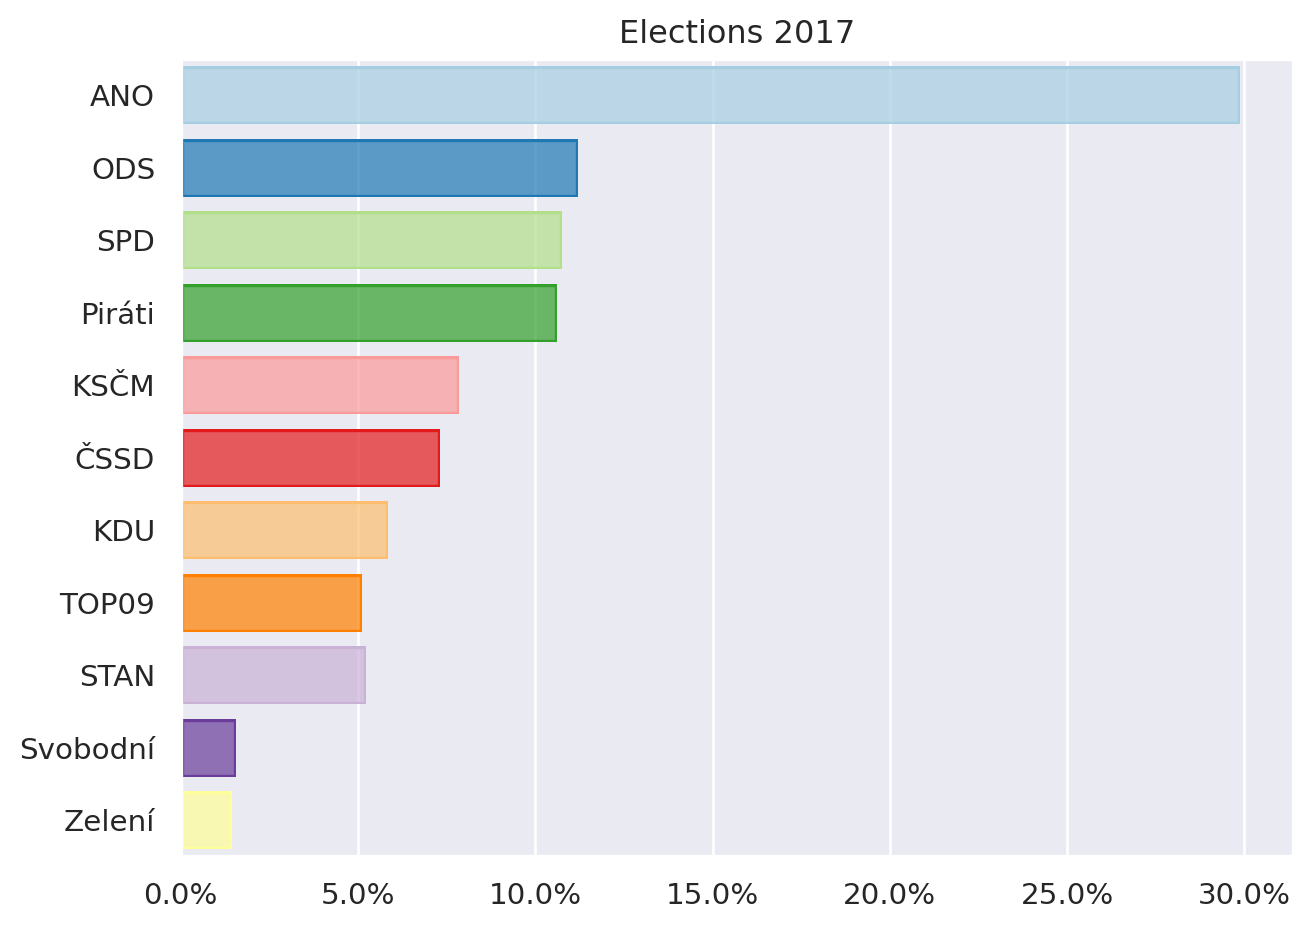

In [86]:

scripts.plot_elections_2017(elections_extended)


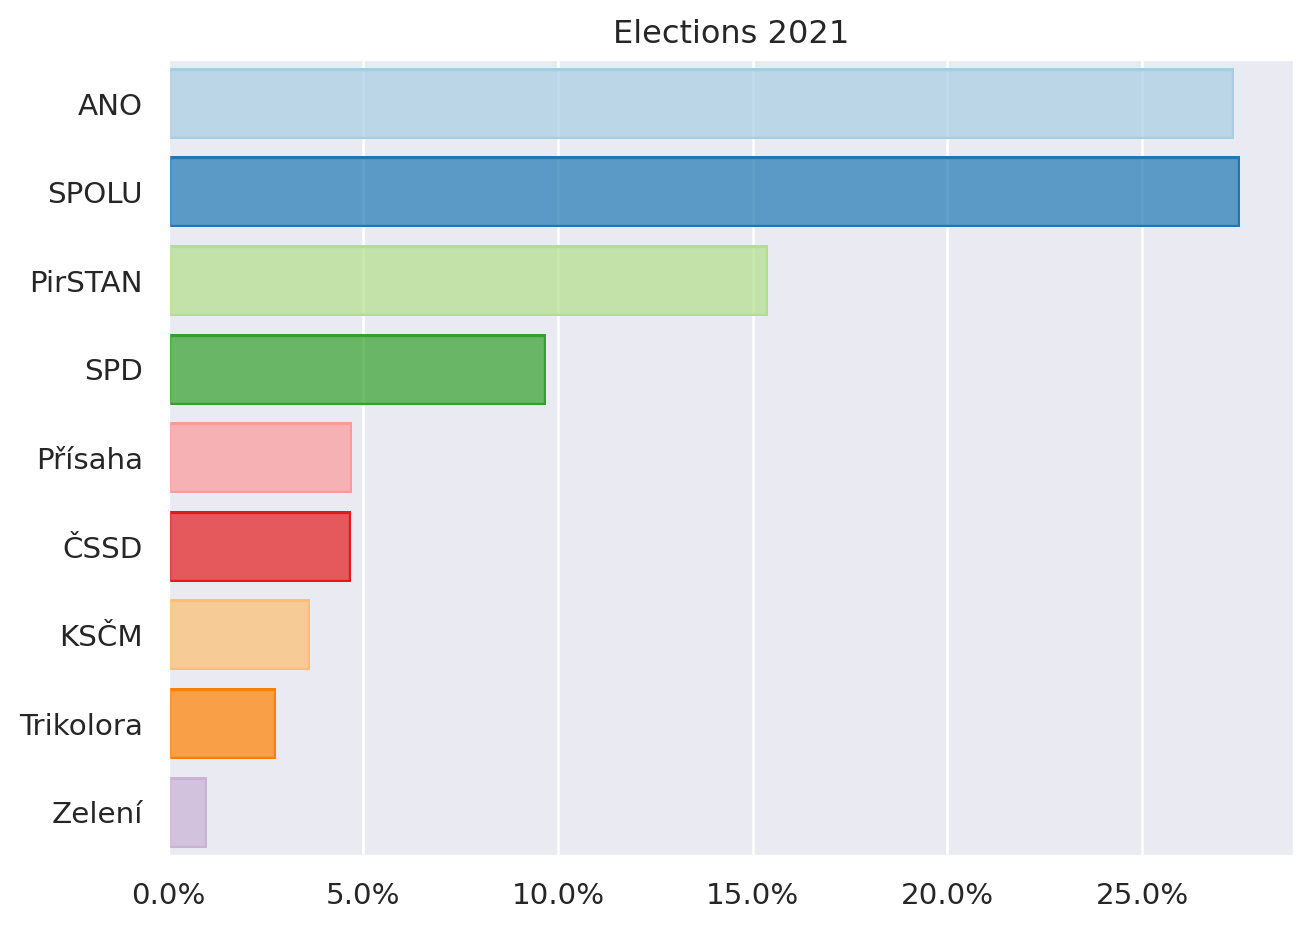

In [87]:
scripts.plot_elections_2021(elections_extended)


In [88]:
elections_extended['vel.obce_cat'].astype("category")


obec_okrsek
500011_1      1-5k
500011_2      1-5k
500011_3      1-5k
500020_1      1-5k
500020_2      1-5k
             ...  
599948_4      1-5k
599956_1      1-5k
599964_1    500-1k
599999_1      1-5k
599999_2      1-5k
Name: vel.obce_cat, Length: 14271, dtype: category
Categories (8, object): ['1-5k', '10-20k', '100k+', '20-50k', '5-10k', '50-100k', '500-', '500-1k']

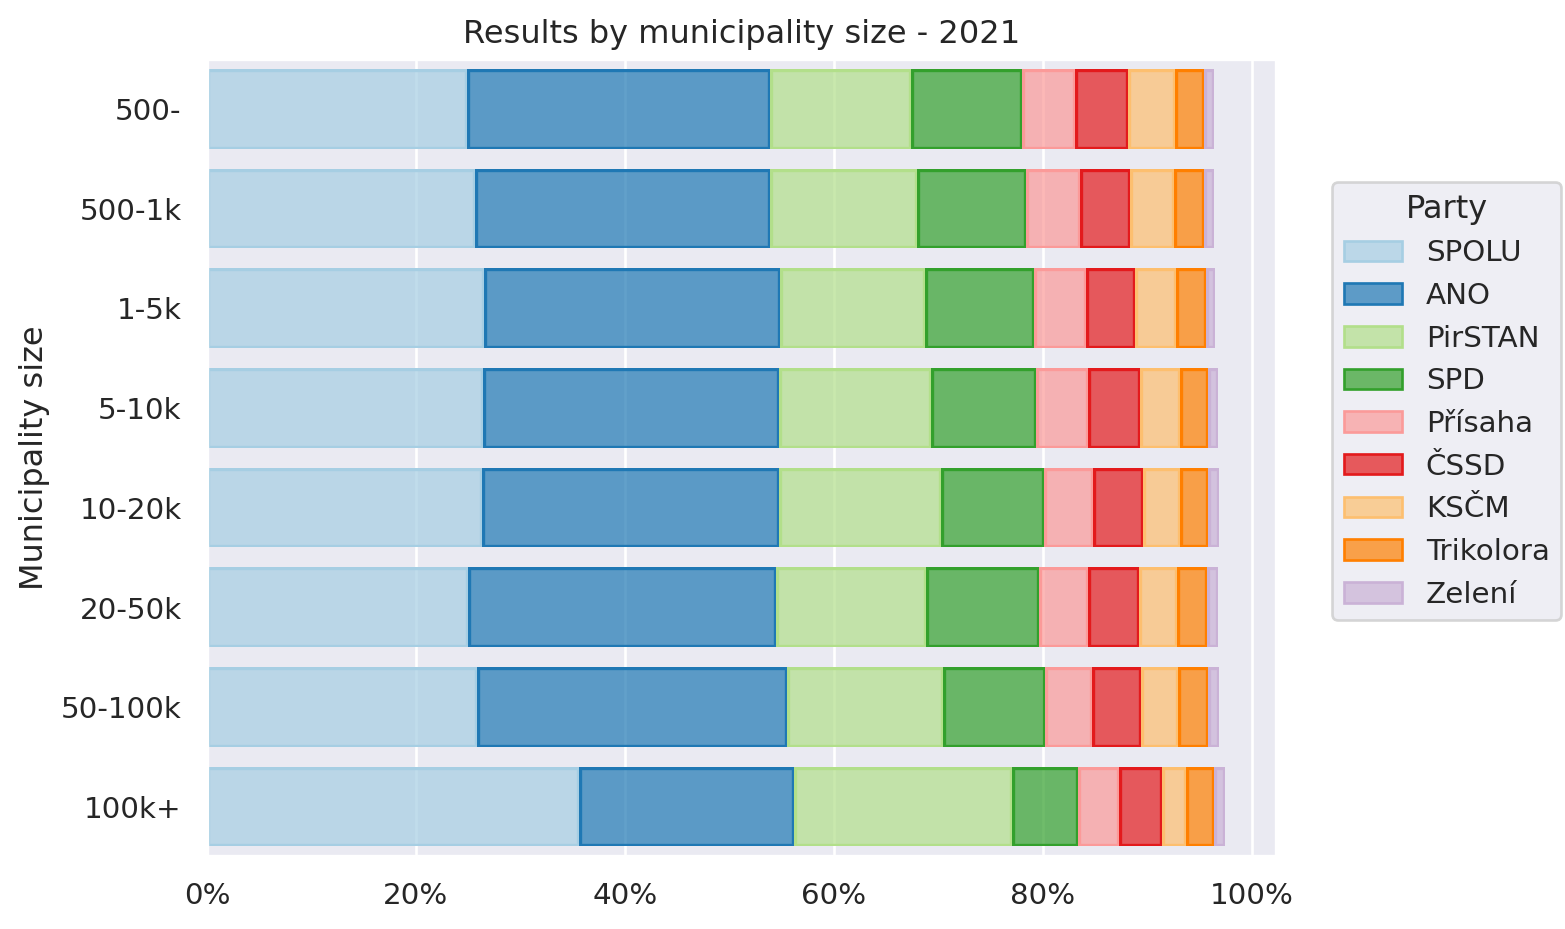

In [89]:
scripts.elections2021_size_plot(elections_extended)

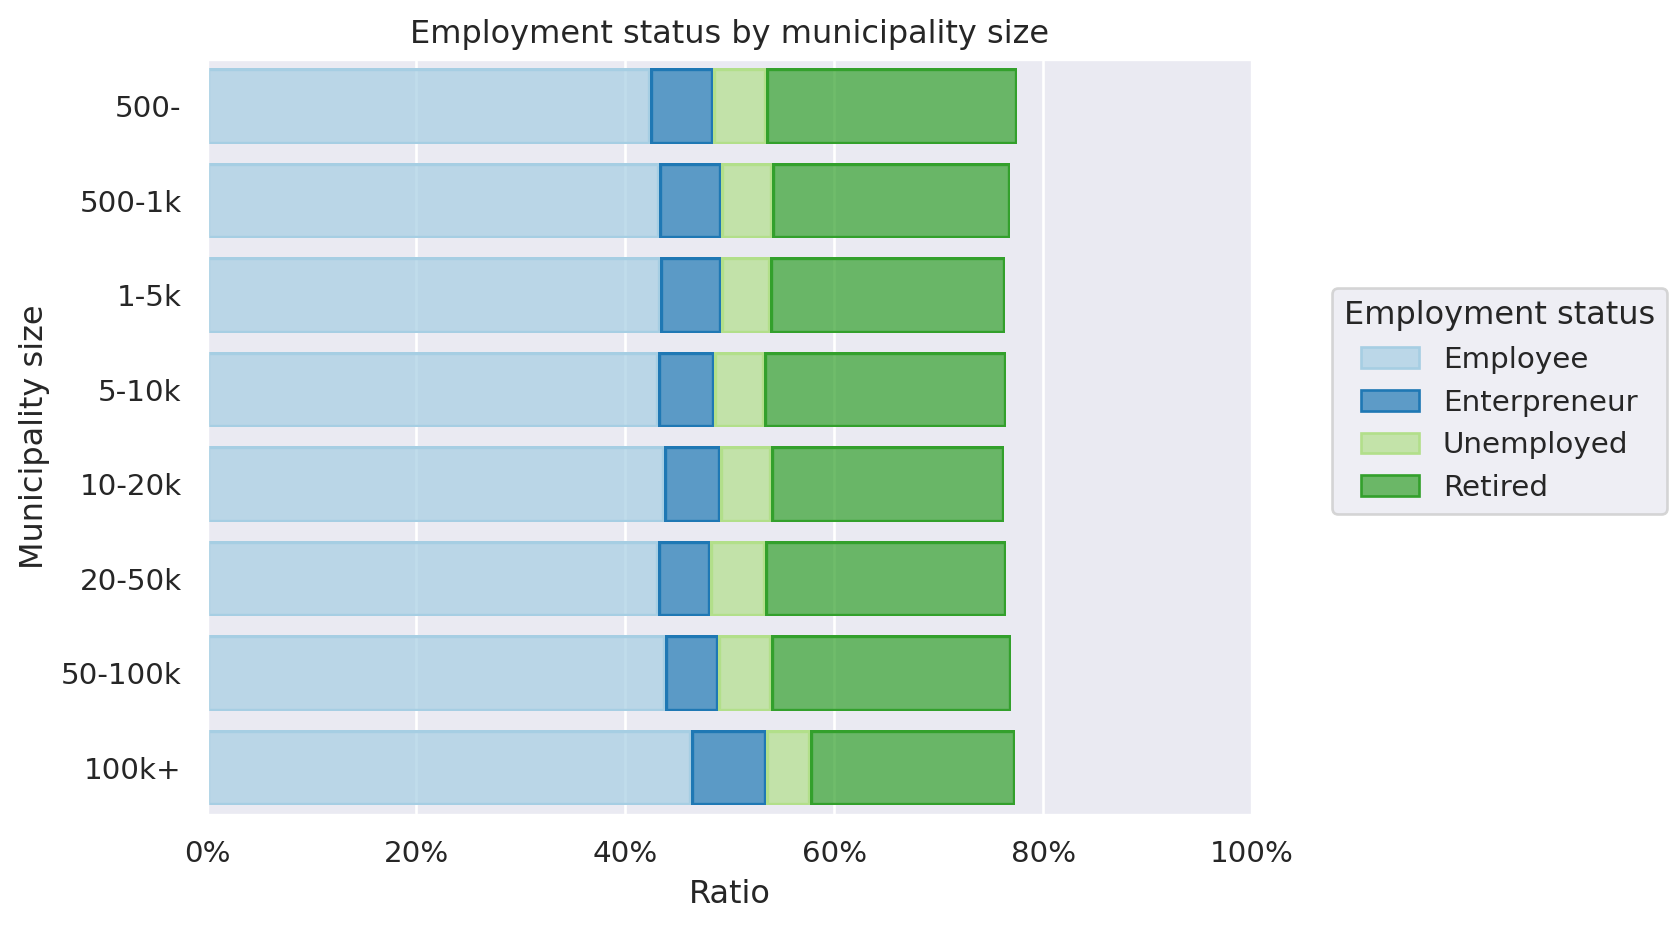

In [90]:
scripts.box_cross_size_plot(elections_extended,"sl11obyvatel",{
        "sl11zam": "Employee",
        "sl11pod": "Enterpreneur",
        "sl11nezam": "Unemployed",
        "sl11neprduch": "Retired",
    }).label(
            x="Ratio",
            y="Municipality size",
            title="Employment status by municipality size",
            color="Employment status",
        ).limit(x=(0,1.0)).theme(scripts.object_theme)

In [91]:


scripts.correlations_2017(elections_extended)

,Men,Divorced,Children,Pensioners,Catholic,Roma,University,Vocational,Extended high school,High school with maturita,High school without maturita,Elementary school,Employees,Enterpreneurs,Unemployed,Retired
ANO,0.041093,0.026135,0.034524,-0.022401,-0.159647,-0.009232,-0.377577,-0.243306,-0.133087,-0.185962,0.337919,0.246680,-0.134646,-0.330366,0.155623,0.124068
ODS,-0.060295,0.077424,-0.027001,-0.003415,-0.176227,-0.024944,0.484473,0.274207,0.243706,0.358873,-0.453015,-0.416512,0.245244,0.405183,-0.270931,-0.174787
TOP09,-0.056719,0.163635,-0.061479,-0.071983,-0.214413,-0.023842,0.449711,0.312683,0.216965,0.334843,-0.425833,-0.402878,0.276777,0.318843,-0.212106,-0.240309
SPD,0.056423,0.110595,0.093404,-0.150424,-0.037560,0.000987,-0.316076,-0.205852,-0.168482,-0.246670,0.249080,0.268286,-0.131381,-0.203303,0.312336,-0.038341
KSČM,0.077569,-0.039317,-0.022018,0.081557,-0.033460,0.095163,-0.405961,-0.236990,-0.231511,-0.351982,0.376581,0.398431,-0.269806,-0.270776,0.241618,0.223969
ČSSD,-0.056563,-0.036474,-0.086778,0.138584,0.135655,0.022344,-0.128071,-0.070846,-0.024863,-0.072048,0.146026,0.146079,-0.118196,-0.212407,0.031467,0.196440
KDU,0.005917,-0.376418,0.036371,0.087908,0.772638,-0.031583,-0.001044,-0.026492,-0.047736,-0.033789,0.072947,0.063060,-0.058209,-0.014486,-0.049097,0.091310
Piráti,-0.106459,0.153778,-0.086571,0.008118,-0.173483,-0.018851,0.603053,0.346914,0.257751,0.341346,-0.549818,-0.461539,0.232575,0.385660,-0.237762,-0.197837
STAN,0.043754,-0.074612,0.069653,-0.022076,-0.091907,-0.012162,-0.041547,0.029837,0.004995,0.013866,0.023435,-0.046621,0.055114,0.150077,-0.102341,-0.031299
Zelení,-0.093035,0.169291,-0.064333,-0.005738,-0.121956,0.013135,0.309264,0.164134,0.153460,0.166509,-0.318216,-0.199423,0.078574,0.099264,-0.064751,-0.104194


In [92]:
scripts.correlations_2017(elections_extended)

,Men,Divorced,Children,Pensioners,Catholic,Roma,University,Vocational,Extended high school,High school with maturita,High school without maturita,Elementary school,Employees,Enterpreneurs,Unemployed,Retired
ANO,0.041093,0.026135,0.034524,-0.022401,-0.159647,-0.009232,-0.377577,-0.243306,-0.133087,-0.185962,0.337919,0.246680,-0.134646,-0.330366,0.155623,0.124068
ODS,-0.060295,0.077424,-0.027001,-0.003415,-0.176227,-0.024944,0.484473,0.274207,0.243706,0.358873,-0.453015,-0.416512,0.245244,0.405183,-0.270931,-0.174787
TOP09,-0.056719,0.163635,-0.061479,-0.071983,-0.214413,-0.023842,0.449711,0.312683,0.216965,0.334843,-0.425833,-0.402878,0.276777,0.318843,-0.212106,-0.240309
SPD,0.056423,0.110595,0.093404,-0.150424,-0.037560,0.000987,-0.316076,-0.205852,-0.168482,-0.246670,0.249080,0.268286,-0.131381,-0.203303,0.312336,-0.038341
KSČM,0.077569,-0.039317,-0.022018,0.081557,-0.033460,0.095163,-0.405961,-0.236990,-0.231511,-0.351982,0.376581,0.398431,-0.269806,-0.270776,0.241618,0.223969
ČSSD,-0.056563,-0.036474,-0.086778,0.138584,0.135655,0.022344,-0.128071,-0.070846,-0.024863,-0.072048,0.146026,0.146079,-0.118196,-0.212407,0.031467,0.196440
KDU,0.005917,-0.376418,0.036371,0.087908,0.772638,-0.031583,-0.001044,-0.026492,-0.047736,-0.033789,0.072947,0.063060,-0.058209,-0.014486,-0.049097,0.091310
Piráti,-0.106459,0.153778,-0.086571,0.008118,-0.173483,-0.018851,0.603053,0.346914,0.257751,0.341346,-0.549818,-0.461539,0.232575,0.385660,-0.237762,-0.197837
STAN,0.043754,-0.074612,0.069653,-0.022076,-0.091907,-0.012162,-0.041547,0.029837,0.004995,0.013866,0.023435,-0.046621,0.055114,0.150077,-0.102341,-0.031299
Zelení,-0.093035,0.169291,-0.064333,-0.005738,-0.121956,0.013135,0.309264,0.164134,0.153460,0.166509,-0.318216,-0.199423,0.078574,0.099264,-0.064751,-0.104194


In [93]:
elections_extended[xs+ys].corr().loc[xs,ys]

NameError: name 'xs' is not defined